In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# reading csv file for train and test data
titanic_data = pd.read_csv('/kaggle/input/titanic/train.csv', index_col = 'PassengerId')
titanic_test_data = pd.read_csv('/kaggle/input/titanic/test.csv',index_col = 'PassengerId')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# steps to follow
1. finding missing values using heatmap
2. finding which features are having outliers
3. caping the features having outliers
4. handling the missing values
5. after this scaling down the features --> this portion is led
6. after all this our data is ready for our model


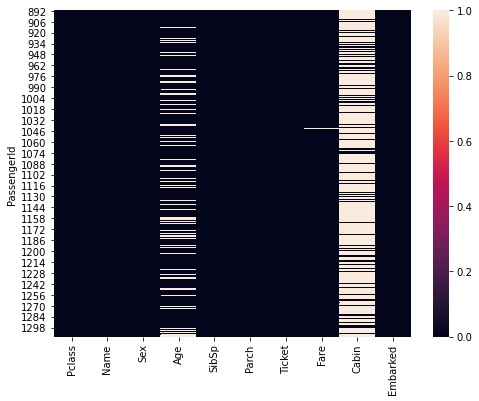

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(titanic_test_data.isnull())

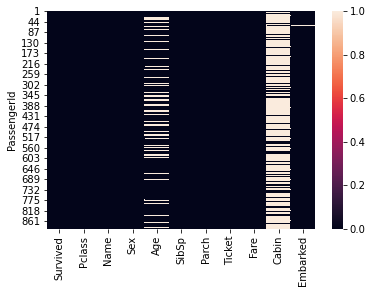

In [5]:
sns.heatmap(titanic_data.isnull())

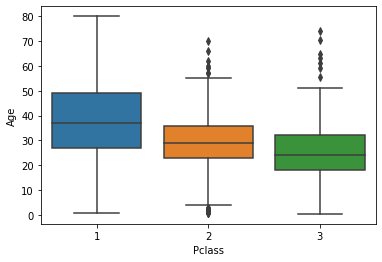

In [6]:
sns.boxplot(y= 'Age',x = 'Pclass',orient = 'v' , data = titanic_data)

In [7]:
print(titanic_data.Age.shape)
print(titanic_data.Age.isnull().sum())
for i in [1,2,3]:
    print(f'pclass {i} has {titanic_data.Age[titanic_data.Pclass == i].isnull().sum()} nan values')

(891,)
177
pclass 1 has 30 nan values
pclass 2 has 11 nan values
pclass 3 has 136 nan values


In [8]:
m1 = titanic_data.Age[titanic_data.Pclass==1].mean()
m2 = titanic_data.Age[titanic_data.Pclass==2].mean()
m3 = titanic_data.Age[titanic_data.Pclass==3].mean()

In [9]:
# function for handling outliers and nan in Age with respect to Pclass
def outlier_nan(lst):
    age = lst[0]
    pclass = lst[1]
    if pclass == 2:
        if age > 54:
            return 54
        elif age<5:
            return 5
        elif pd.isnull(age):
            return m2
        else:
            return age
    elif pclass ==3 :
        if age>42:
            return 42
        elif age <8:
            return  8
        elif pd.isnull(age):
            return m3
        else:
            return age
    else:
        if age <3:
            return 3
        elif age >70:
            return 70
        elif pd.isnull(age):
            return m1
        else:
            return age
    

In [10]:
titanic_data['Age']=titanic_data[['Age','Pclass']].apply(outlier_nan, axis = 1)

In [11]:
# again checking for the nan values
print(titanic_data.Age.shape)
print(titanic_data.Age.isnull().sum())
for i in [1,2,3]:
    print(f'pclass {i} has {titanic_data.Age[titanic_data.Pclass == i].isnull().sum()} nan values')

(891,)
0
pclass 1 has 0 nan values
pclass 2 has 0 nan values
pclass 3 has 0 nan values


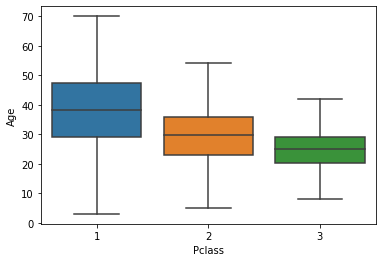

In [12]:
# boxplot for age wrt pclass
sns.boxplot(y= 'Age',x = 'Pclass',orient = 'v' , data = titanic_data)

In [13]:
titanic_data.Fare.isnull().sum()

0

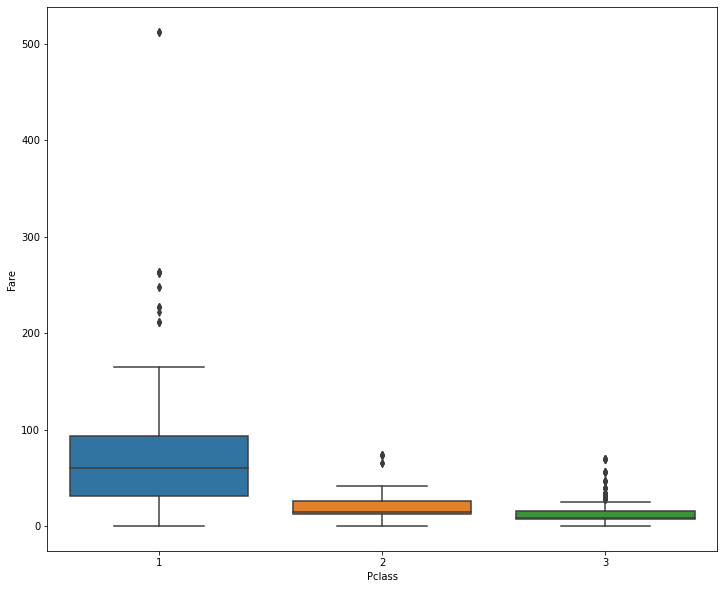

In [14]:
plt.figure(figsize=(12,10))
sns.boxplot(x = 'Pclass',y='Fare',data = titanic_data)

In [15]:
# handling the outliers in the Fare
def fare(lst):
    f = lst[0]
    pclass = lst[1]
    if pclass ==1:
        if f > 170:
            return 170
        else:
            return f
    elif pclass ==2:
        if f > 45:
            return 45
        else:
            return f
        
    elif pclass == 3:
        if f>25:
            return 25
        else:
            return f

In [16]:
titanic_data['Fare']=titanic_data[['Fare','Pclass']].apply(fare, axis = 1)

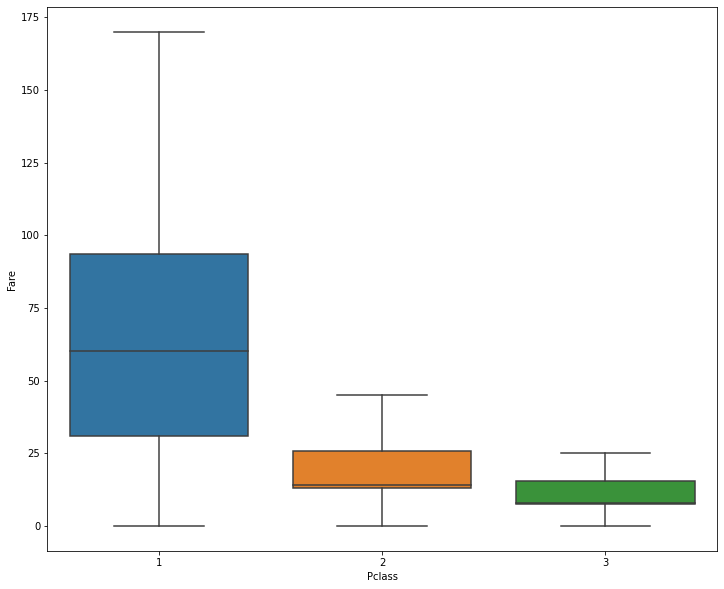

In [17]:
plt.figure(figsize=(12,10))
sns.boxplot(x = 'Pclass',y='Fare',data = titanic_data)

In [18]:
# as we have seen that our cabin data is almost null
import numpy as np
titanic_data['Cabin'] = np.where(titanic_data.Cabin.isnull(),1,0)

In [19]:
titanic_data.Cabin.isnull().sum()

0

In [20]:
# can see that there are more missing values in the cabin, so we will replace this column
# for age column we can fill there values wrt Pclass

titanic_data.drop(['Name','Ticket'], axis=1, inplace = True)

In [21]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.00000,1,0,7.2500,1,S
2,1,1,female,38.00000,1,0,71.2833,0,C
3,1,3,female,26.00000,0,0,7.9250,1,S
4,1,1,female,35.00000,1,0,53.1000,0,S
5,0,3,male,35.00000,0,0,8.0500,1,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.00000,0,0,13.0000,1,S
888,1,1,female,19.00000,0,0,30.0000,0,S
889,0,3,female,25.14062,1,2,23.4500,1,S


In [22]:
# def fill_null(lst):
#     age = lst[0]
#     pclass = lst[1]
#     if pd.isnull(age):
#         print(age)
#         if pclass == 1:
#             return 37
#         elif pclass == 2:
#             return 29
#         else:
#             return 24
        
#     else:
#         return age

# titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(fill_null, axis = 1)

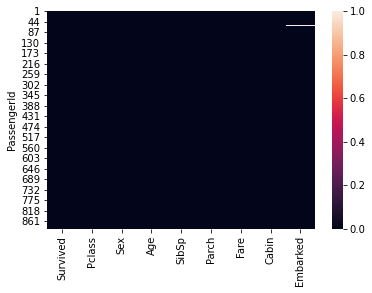

In [23]:
import seaborn as sns
sns.heatmap(titanic_data.isnull())

In [24]:
titanic_data.Embarked.fillna('S',axis = 0, inplace = True)

In [25]:
titanic_data.Embarked.isnull().sum()

0

In [26]:
# dummy variables
sex = pd.get_dummies(titanic_data['Sex'], drop_first = True)
embarked = pd.get_dummies(titanic_data['Embarked'], drop_first = True)

In [27]:
sex

,male
PassengerId,
1,1
2,0
3,0
4,0
5,1
...,...
887,1
888,0
889,0


In [28]:
titanic_data.drop(['Sex','Embarked'], axis = 1, inplace = True)

In [29]:
train = pd.concat([titanic_data, sex, embarked], axis = 1)

In [30]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,1
5,0,3,35.0,0,0,8.0500,1,1,0,1


# preprocessing the test data

In [31]:
t1 = titanic_test_data.Age[titanic_test_data.Pclass ==1].mean()
t2 = titanic_test_data.Age[titanic_test_data.Pclass ==2].mean()
t3 = titanic_test_data.Age[titanic_test_data.Pclass ==3].mean()

def test_age(lst):
    age = lst[0]
    pclass = lst[1]
    if pclass == 1:
        if pd.isnull(age):
            return t1
        else:
            return age
    elif pclass ==2:
        if age>50 :
            return 50
        elif pd.isnull(age):
            return t2
        else:
            return age
    elif pclass == 3:
        if age > 46:
            return 46
        elif age< 2:
            return 2
        elif pd.isnull(age):
            return t3
        else:
            return age

In [32]:
titanic_test_data['Age']= titanic_test_data[['Age','Pclass']].apply(test_age, axis = 1)

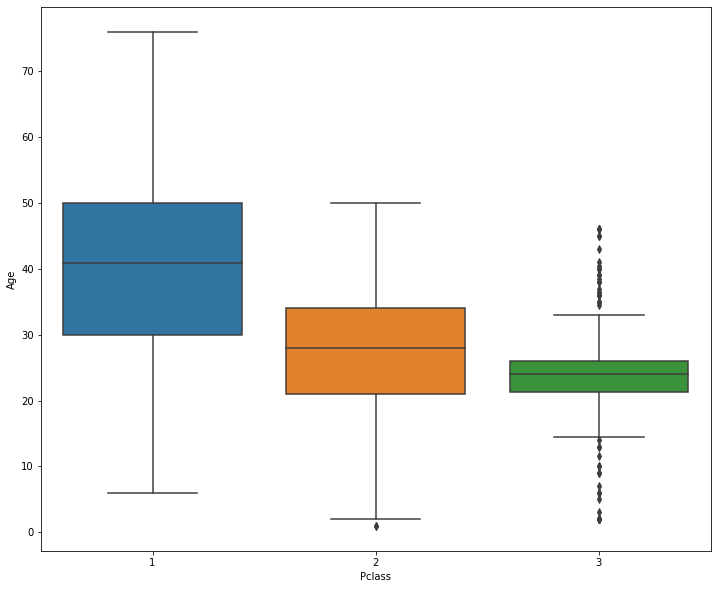

In [33]:
plt.figure(figsize=(12,10))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_test_data)

In [34]:
titanic_test_data.Age.isnull().sum()

0

In [35]:
titanic_test_data.Fare.fillna(method='bfill', inplace = True)

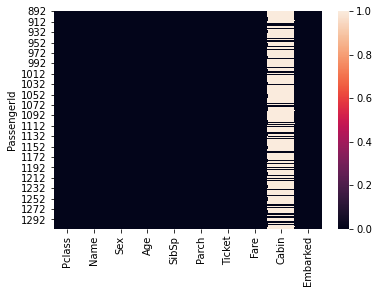

In [36]:
sns.heatmap(titanic_test_data.isnull())

In [37]:
titanic_test_data['Cabin'] = np.where(titanic_test_data.isnull(),1,0)

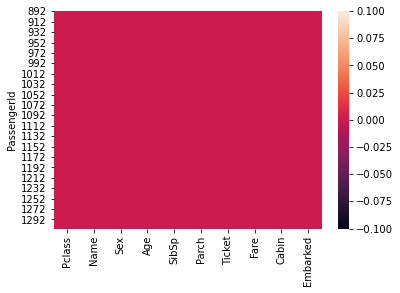

In [38]:
sns.heatmap(titanic_test_data.isnull())

In [39]:
sex = pd.get_dummies(titanic_test_data['Sex'], drop_first = True)
embarked = pd.get_dummies(titanic_test_data['Embarked'], drop_first = True)

In [40]:
titanic_test_data.drop(['Name','Sex','Embarked','Ticket'], axis = 1, inplace = True)

In [41]:
test = pd.concat([titanic_test_data,sex,embarked], axis = 1)

In [42]:
test.shape

(418, 9)

In [43]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
PassengerId,,,,,,,,,
892,3,34.5,0,0,7.8292,0,1,1,0
893,3,46.0,1,0,7.0000,0,0,0,1
894,2,50.0,0,0,9.6875,0,1,1,0
895,3,27.0,0,0,8.6625,0,1,0,1
896,3,22.0,1,1,12.2875,0,0,0,1


# now our data is ready for our model

In [44]:
X = train.iloc[:,1:]
y = train.iloc[:,0]

In [45]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

# partitioning the data into train and test

In [46]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

# decision tree

In [47]:

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
pred = dec_tree.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,pred)

print(score)
# predicting for the test data 
dec_tree_pred = dec_tree.predict(test)
dec_tree_pred
# creating dataframe for the output of decision tree
output = pd.DataFrame({'PassengerID':titanic_test_data.index,
                      'Survived': dec_tree_pred})

output.set_index('PassengerID', inplace = True)
# converting df to csv
output.to_csv('submission_with_dec_tree.csv')

0.7932960893854749


# support vector machine

In [48]:

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred = svc.predict(X_test)

score_svc = accuracy_score(y_test,pred)
print(score_svc)

# predicting for the test data
svc_pred = svc.predict(test)

output = pd.DataFrame({'PassengerID':titanic_test_data.index,
                      'Survived': svc_pred})
output.set_index('PassengerID', inplace = True)

# converting df to csv
output.to_csv('submission_with_svc.csv')

0.7150837988826816


# GaussianNB

In [49]:
from sklearn.naive_bayes import GaussianNB
gauss_nb = GaussianNB()
gauss_nb.fit(X_train,y_train)
pred = gauss_nb.predict(X_test)
score_gnb = accuracy_score(y_test,pred)
print(score_gnb)
# predicting the test data
gauss_nb_pred = gauss_nb.predict(test)

output = pd.DataFrame({'PassengerID':titanic_test_data.index,
                      'Survived': gauss_nb_pred})
output.set_index('PassengerID', inplace = True)


# converting df to csv
output.to_csv('submission_with_GaussianNB.csv')

0.8268156424581006


# KNeighborsClassifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
lst = list(range(1,100))
score_knc = []
for i in lst:
    knc = KNeighborsClassifier(i)
    knc.fit(X_train,y_train)
    pred = knc.predict(X_test)
    score_val = accuracy_score(y_test,pred)
    print(f'{i}--{score_val}')
    score_knc.append(score_val)
    
i = score_knc.index(max(score_knc))

1--0.6871508379888268
2--0.7039106145251397
3--0.7597765363128491
4--0.7094972067039106
5--0.7486033519553073
6--0.7318435754189944
7--0.776536312849162
8--0.7374301675977654
9--0.7597765363128491
10--0.7318435754189944
11--0.7430167597765364
12--0.7262569832402235
13--0.7653631284916201
14--0.7430167597765364
15--0.7653631284916201
16--0.7541899441340782
17--0.7541899441340782
18--0.7541899441340782
19--0.7541899441340782
20--0.7653631284916201
21--0.770949720670391
22--0.7597765363128491
23--0.7541899441340782
24--0.7597765363128491
25--0.7486033519553073
26--0.7430167597765364
27--0.7541899441340782
28--0.7430167597765364
29--0.7541899441340782
30--0.7430167597765364
31--0.7486033519553073
32--0.7430167597765364
33--0.7430167597765364
34--0.7486033519553073
35--0.7430167597765364
36--0.7486033519553073
37--0.7430167597765364
38--0.7262569832402235
39--0.7374301675977654
40--0.7262569832402235
41--0.7318435754189944
42--0.7262569832402235
43--0.7262569832402235
44--0.7206703910614525

In [51]:

knc = KNeighborsClassifier(i)
knc.fit(X_train,y_train)
pred = knc.predict(X_test)
knn_score = accuracy_score(y_test,pred)
print(knn_score)

# predicting for the test data
knc_pred = knc.predict(test)


# creating the dataframe
output = pd.DataFrame({'PassengerID':titanic_test_data.index,
                      'Survived': knc_pred})
output.set_index('PassengerID', inplace = True)


# converting df to csv
output.to_csv('submission_with_knc.csv')



0.7318435754189944


# LinearRegression

In [52]:
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# # train 
# regressor.fit(X_train,y_train)
# # test
# predicted = regressor.predict(X_test)

# predicted

# output = pd.DataFrame({'PassengerID':titanic_test_data.index,
#                       'Survived': final_pred})

# # converting df to csv
# output.to_csv('submission_with_LR.csv')

# LogisticRegression

In [53]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
# train 
log_reg.fit(X_train,y_train)
# predict
pred = log_reg.predict(X_test)

pred

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, pred)
print(score)
# predicting for the test data
log_reg_pred = log_reg.predict(test)

output = pd.DataFrame({'PassengerID':titanic_test_data.index,
                      'Survived': log_reg_pred})
output.set_index('PassengerID', inplace = True)

# converting df to csv
output.to_csv('submission_with_LR.csv')

0.8379888268156425


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
